##  Geha+25, Figure 5:   Telluric fits for each slit in a mask

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from astropy import table
from astropy.table import Table, Column
from astropy.io import ascii, fits

from astropy.table import vstack
from dmost.core import dmost_utils,dmost_chi2_template

DEIMOS_RAW   = os.getenv('DEIMOS_RAW')
DEIMOS_REDUX = os.getenv('DEIMOS_REDUX')


In [2]:
plt.rcParams.update({
    "figure.constrained_layout.use": True,
    "figure.dpi": 200,
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "font.size": 16,
    "axes.labelsize": 16,
    "legend.frameon": False,
    "legend.handletextpad": 0.5,
    "lines.markersize": 5,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.major.size": 7,
    "xtick.minor.size": 4,
    "ytick.major.size": 7,
    "ytick.minor.size": 4,
    "savefig.bbox": "tight",
    "savefig.dpi": 200,
})

In [3]:
mask = 'dra2'
nexp = 0

data_dir   = DEIMOS_REDUX+mask
dmost_file = data_dir+'/dmost/dmost_'+mask+'.fits'

# For repo, fix data file
dmost_file = 'dmost_'+mask+'.fits'

slits, mask = dmost_utils.read_dmost(dmost_file)
fslits2=slits

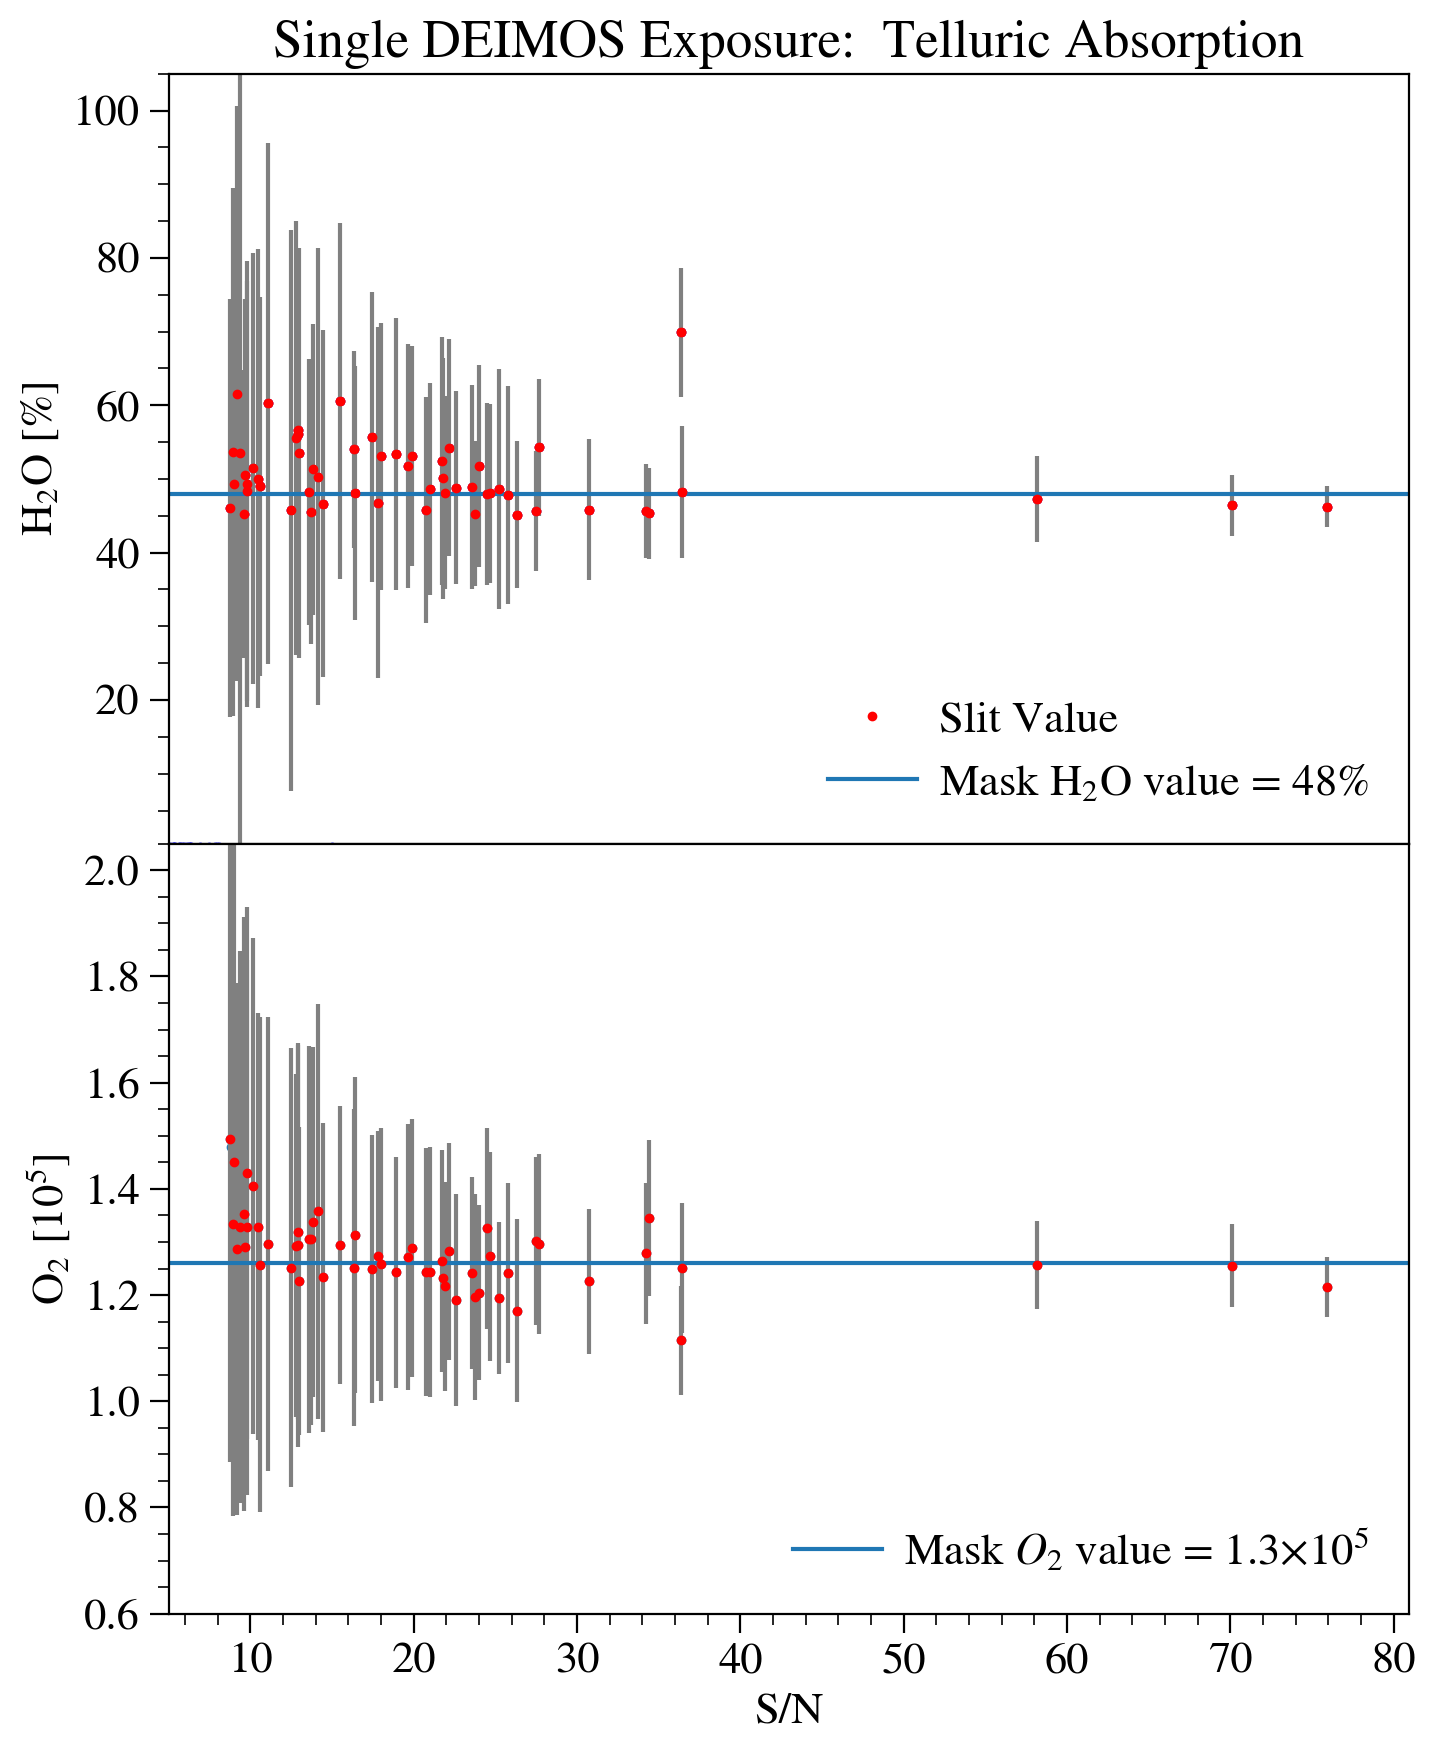

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(8,10),sharex=True)
fig.subplots_adjust(hspace=0)


final_h2o = mask['telluric_h2o'][nexp]
final_o2  = mask['telluric_o2'][nexp]

m= (fslits2['telluric_chi2'][:,nexp] < 25) & (fslits2['telluric_chi2'][:,nexp] > 0) & \
     (fslits2['telluric_h2o'][:,nexp] > 1) & (fslits2['telluric_h2o'][:,nexp] < 120) & \
     (fslits2['telluric_o2'][:,nexp] > 0.6) & (fslits2['telluric_o2'][:,nexp] < 2.5) & \
     (fslits2['telluric_h2o_err'][:,nexp] > 0.01) & (fslits2['telluric_o2_err'][:,nexp] > 0.01) & \
     (np.abs(fslits2['telluric_w'][:,nexp]) < 50)



# PLOT ALL H20
ax1.plot(slits['SN'][:,nexp],slits['telluric_h2o'][:,nexp],'b.')
ax1.plot(slits['SN'][m,nexp],fslits2['telluric_h2o'][m,nexp],'r.',label='Slit Value')
ax1.errorbar(fslits2['SN'][m,nexp],fslits2['telluric_h2o'][m,nexp],\
             yerr=np.abs(fslits2['telluric_h2o_err'][m,nexp]),fmt='.r',ecolor='grey')

lb = 'Mask H$_2$O value = {:0.0f}%'.format(final_h2o)
ax1.axhline(final_h2o,label=lb)
ax1.legend(loc=4)


ax1.set_ylim(0.5,105)

# PLOT ALL O2
ax2.plot(fslits2['SN'][:,nexp],fslits2['telluric_o2'][:,nexp],'.')
ax2.errorbar(fslits2['SN'][m,nexp],fslits2['telluric_o2'][m,nexp],\
             yerr=np.abs(fslits2['telluric_o2_err'][m,nexp]),fmt='.r',ecolor='grey')

lb = r'Mask $O_2$ value = {:0.1f}$ \times 10^5$'.format(final_o2)
ax2.axhline(final_o2,label=lb)
ax2.set_ylim(0.6,2.05)
ax2.legend(loc=4)


ax2.set_xlabel('S/N')
ax1.set_ylabel('H$_2$O [%]')
ax2.set_ylabel(r'O$_2~[10^5]$')

ax1.set_xlim(5,5+np.max(fslits2['SN'][m,nexp]))
ax1.set_title('Single DEIMOS Exposure:  Telluric Absorption')

plt.savefig('figure_telluric_mask.pdf')